In [1]:
## Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
### Word Cloud for Review Titles
from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# Load the dataset
data = pd.read_csv(r'C:\Users\rgupt\Downloads\37000_reviews_of_thread_app.csv\37000_reviews_of_thread_app.csv')
# Following codes to display basic information about the dataset
data.head()

,Unnamed: 0,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,0,Google Play,7cd90e5b-4829-43b9-9fb4-c8c6d1e339c1,Eddie Clark Jr.,NaN,Good,5,0.0,2023-08-07 19:14:36,NaN,NaN,294.0.0.27.110,en,us
1,1,Google Play,6deb8265-2bac-4524-bcb6-f90829fa4e69,Rasa RT,NaN,Weak copy of Twitter,1,0.0,2023-08-07 19:07:04,NaN,NaN,NaN,en,us
2,2,Google Play,91ef61ce-0f05-4f3b-b3d3-5d19cd408ab8,SITI NUR HAFIZA BINTI AZIZ,NaN,i wish threads have a save button for images a...,3,0.0,2023-08-07 18:57:07,NaN,NaN,294.0.0.27.110,en,us
3,3,Google Play,b7721b78-6b77-4f8c-a1d3-a854af4c1f0f,Asap Khalifah,NaN,Love it,5,0.0,2023-08-07 18:37:16,NaN,NaN,NaN,en,us
4,4,Google Play,c89ef522-c94c-4171-878f-1d672dce7f11,Syed Hussein,NaN,Very god,5,0.0,2023-08-07 18:14:15,NaN,NaN,NaN,en,us


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36943 entries, 0 to 36942
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               36943 non-null  int64  
 1   source                   36943 non-null  object 
 2   review_id                36943 non-null  object 
 3   user_name                36943 non-null  object 
 4   review_title             2000 non-null   object 
 5   review_description       36943 non-null  object 
 6   rating                   36943 non-null  int64  
 7   thumbs_up                34943 non-null  float64
 8   review_date              36943 non-null  object 
 9   developer_response       0 non-null      float64
 10  developer_response_date  0 non-null      float64
 11  appVersion               24855 non-null  object 
 12  laguage_code             36943 non-null  object 
 13  country_code             36943 non-null  object 
dtypes: float64(3), int64(2

In [4]:
# Summary statistics
data.describe()


,Unnamed: 0,rating,thumbs_up,developer_response,developer_response_date
count,36943.000000,36943.000000,34943.000000,0.0,0.0
mean,16579.274910,3.349376,1.816845,NaN,NaN
std,10495.544863,1.759170,58.538839,NaN,NaN
min,0.000000,1.000000,0.000000,NaN,NaN
25%,7235.500000,1.000000,0.000000,NaN,NaN
50%,16471.000000,4.000000,0.000000,NaN,NaN
75%,25706.500000,5.000000,0.000000,NaN,NaN
max,34942.000000,5.000000,5557.000000,NaN,NaN


In [5]:
# Check for missing values
data.isnull().sum()

Unnamed: 0                     0
source                         0
review_id                      0
user_name                      0
review_title               34943
review_description             0
rating                         0
thumbs_up                   2000
review_date                    0
developer_response         36943
developer_response_date    36943
appVersion                 12088
laguage_code                   0
country_code                   0
dtype: int64

In [6]:
# Drop the 'unnamed' column as it seems to be index only
data.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
# Create separate bar plots for each source
print(data.groupby(['source']).size()/ len(data)* 100)

source
App Store       5.413745
Google Play    94.586255
dtype: float64


In [8]:
data.groupby(['rating']).size()

rating
1    11282
2     2117
3     2956
4     3588
5    17000
dtype: int64

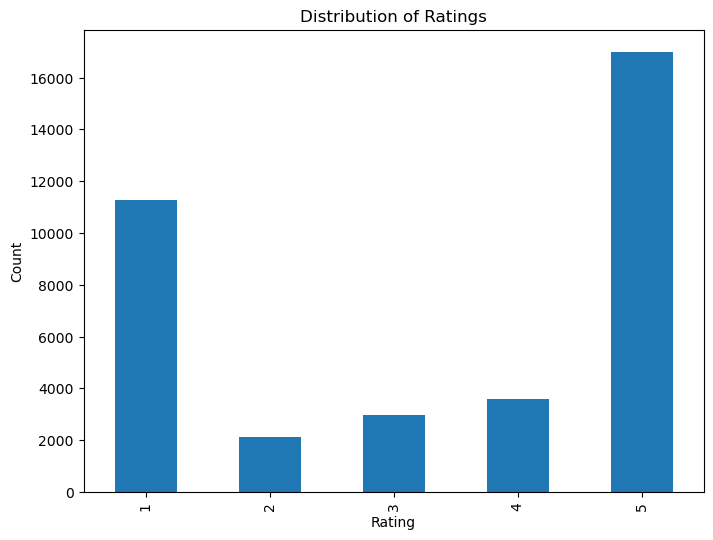

In [9]:
# EDA Plots
# Distribution of Ratings
plt.figure(figsize=(8, 6))
data['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

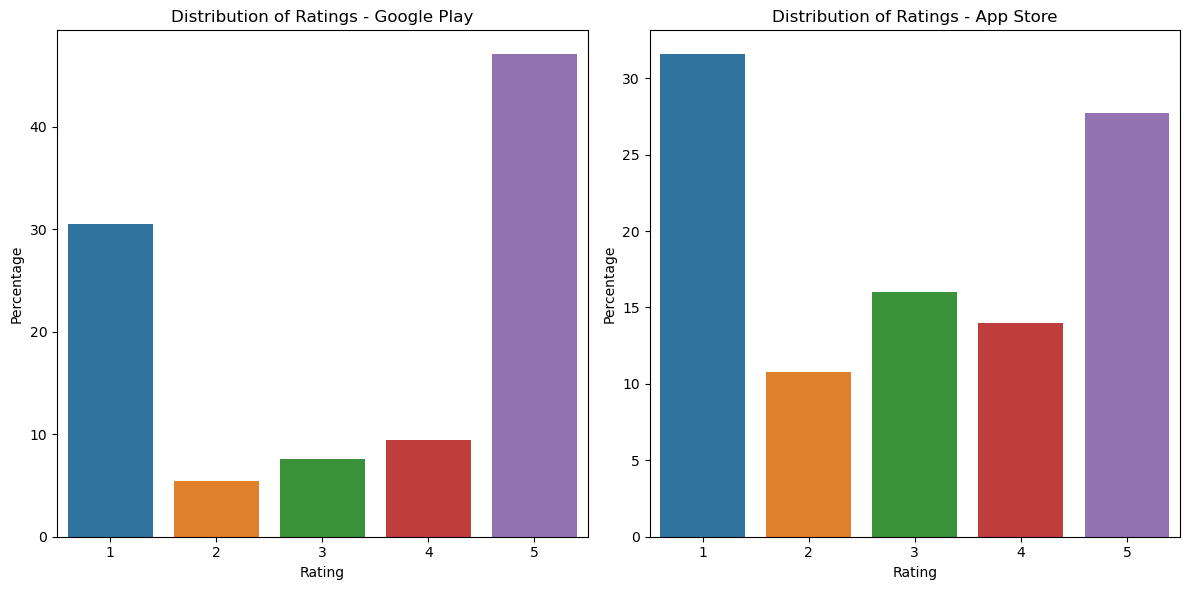

In [10]:
# Calculate the percentage of reviews for each rating and source
rating_source_percentages_Google = (data[data['source'] == 'Google Play']['rating'].value_counts().sort_index() /
                                    len(data[data['source'] == 'Google Play'])) * 100
rating_source_percentages_App = (data[data['source'] == 'App Store']['rating'].value_counts().sort_index() /
                                 len(data[data['source'] == 'App Store'])) * 100

# Create two separate bar plots, one for each source
plt.figure(figsize=(12, 6))

# Plot for Google Play Store source
plt.subplot(1, 2, 1)
sns.barplot(x=rating_source_percentages_Google.index, y=rating_source_percentages_Google.values)
plt.title('Distribution of Ratings - Google Play')
plt.xlabel('Rating')
plt.ylabel('Percentage')

# Plot for App Store source
plt.subplot(1, 2, 2)
sns.barplot(x=rating_source_percentages_App.index, y=rating_source_percentages_App.values)
plt.title('Distribution of Ratings - App Store')
plt.xlabel('Rating')
plt.ylabel('Percentage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [11]:
#Check how many response developer have 
data['developer_response'].unique()

array([nan])

In [12]:
data['laguage_code'].unique()

array(['en'], dtype=object)

In [13]:
data['country_code'].unique()
#only US data is available

array(['us'], dtype=object)

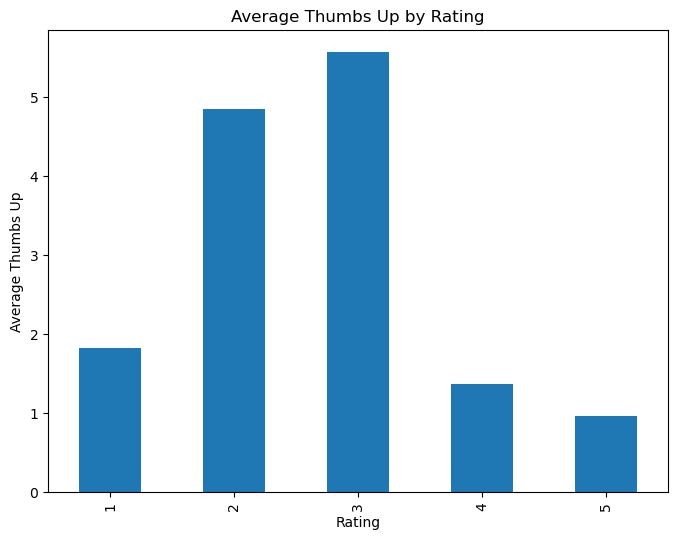

In [14]:
# Thumbs Up vs Rating
plt.figure(figsize=(8, 6))
data.groupby('rating')['thumbs_up'].mean().plot(kind='bar')
plt.title('Average Thumbs Up by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Thumbs Up')
plt.show()


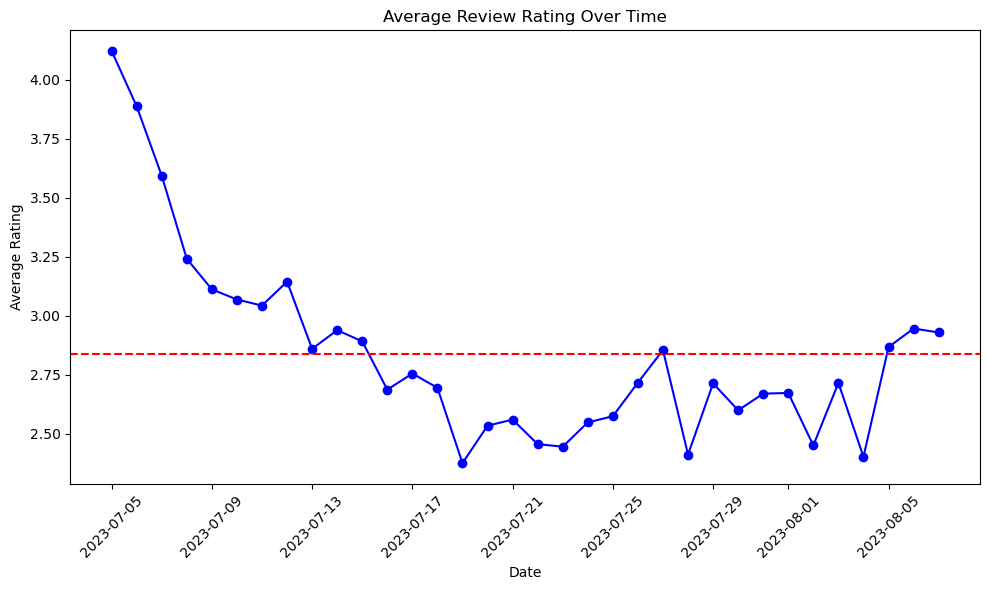

In [15]:
# Convert 'review_date' to datetime
data['review_date'] = pd.to_datetime(data['review_date'])

# Calculate average review rating per day
daily_avg_rating = data.groupby(data['review_date'].dt.date)['rating'].mean()

# Calculate overall mean rating
overall_mean_rating = daily_avg_rating.mean()

# Plotting
plt.figure(figsize=(10, 6))
daily_avg_rating.plot(kind='line', marker='o', color='blue')

# Add overall mean line
plt.axhline(y=overall_mean_rating, color='red', linestyle='--', label=f'Overall Mean ({overall_mean_rating:.2f})')

plt.title("Average Review Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


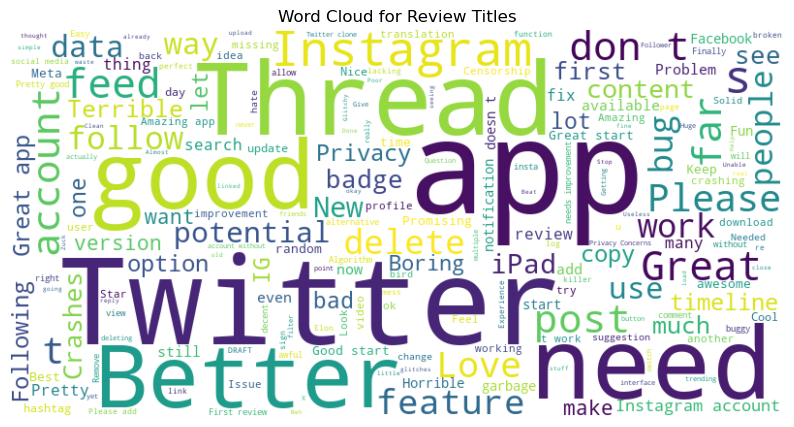

In [16]:
text = ' '.join(data['review_title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Titles')
plt.show()

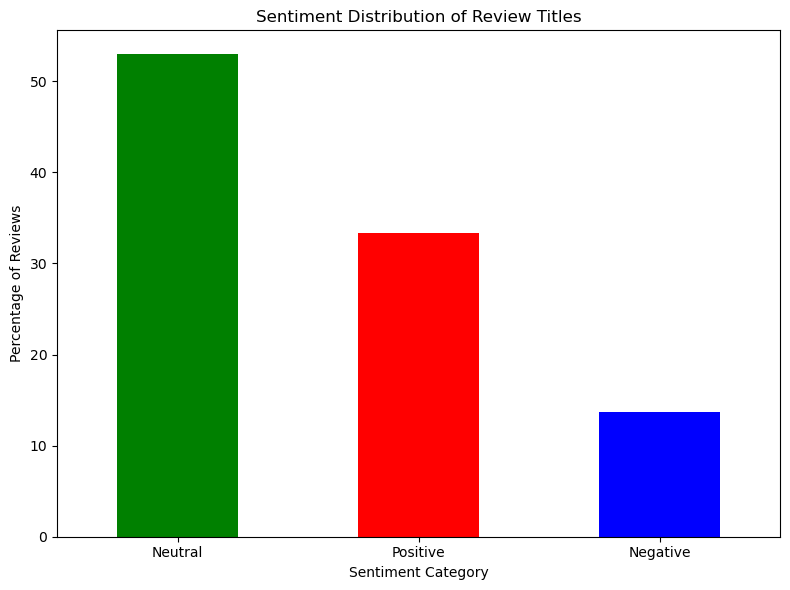

In [17]:
# Perform sentiment analysis on review titles
def analyze_sentiment(title):
    if isinstance(title, str):
        analysis = TextBlob(title)
        # Determine polarity (-1 to 1, where -1 is negative, 0 is neutral, and 1 is positive)
        polarity = analysis.sentiment.polarity
        return polarity
    else:
        return None

data['sentiment'] = data['review_title'].apply(analyze_sentiment)

# Drop rows with NaN sentiment values
data = data.dropna(subset=['sentiment'])

# Categorize sentiment
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Calculate sentiment distribution as percentage
sentiment_percentages = (data['sentiment_category'].value_counts() / len(data)) * 100

# Plot sentiment distribution as percentage
plt.figure(figsize=(8, 6))
sentiment_percentages.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Review Titles')
plt.xlabel('Sentiment Category')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
